In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('training_clean_and_complete.csv')

In [3]:
# df.columns

In [4]:
# # Let's drop the first column
# df = df.drop(df.columns[0], axis=1)

In [5]:
# # Let's move our target variable to the end of the df
# col = df.pop("diabetes_mellitus")
# df.insert(143, col.name, col)

In [6]:
# # Let's rewrite our training dataset
# df.to_csv("training_final.csv", encoding='utf-8', index=True)

In [7]:
df = pd.read_csv('training_final.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'readmission_status', 'apache_post_operative', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache',
       ...
       'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'diabetes_mellitus'],
      dtype='object', length=145)

In [9]:
# Let's drop the first column
df = df.drop(df.columns[0], axis=1)

In [10]:
df.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus
0,214826,118,0,92,0,0,0,0,0,0,...,36.1,557,487.0,4.2,3.8,145.0,145.0,23.3,12.7,1
1,246060,81,0,90,0,0,0,0,0,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,1
2,276985,118,0,93,0,0,0,0,0,0,...,25.9,198,43.0,5.0,3.5,139.0,138.0,9.0,8.0,0
3,262220,118,1,92,0,1,0,0,1,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,0
4,201746,33,0,91,0,0,0,0,0,0,...,44.2,159,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0


## Create X (matrix of features) and y (target variable vector)

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split data into train and test set

In [12]:
# We'll split using the 30/70 rule, that is 30% of data will be our test and 70% will be our training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Feature Scaling

In [13]:
# Chceck to make sure that the 60th column is the first numerical column -- it should be age
df.iloc[:, 60]

0         77
1         25
2         81
3         19
4         67
          ..
130151    50
130152    79
130153    73
130154    81
130155    35
Name: age, Length: 130156, dtype: int64

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Note that thte 60th column is a
X_train[:, 60:] = sc.fit_transform(X_train[:, 60:])
X_test[:, 60:] = sc.transform(X_test[:, 60:])

## Rebalance training dataset

In [16]:
# Check balance
target_count = df['diabetes_mellitus'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 102005
Class 1: 28151
Proportion: 3.62 : 1


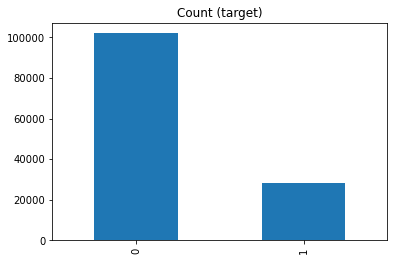

In [17]:
target_count.plot(kind='bar', title='Count (target)');

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diabetes_mellitus==0]
df_minority = df[df.diabetes_mellitus==1]
 

### Under sampling/Down Sampling

In [19]:
# # Downsample majojrity class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=40000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.diabetes_mellitus.value_counts()

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=.65, random_state=50, replacement=False) 
# sample without replacement
# sampling strategy =.65 allows for 40/60 balance of target variable
# corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Check how many observations were removed -- looks like about 50,000
print(len(X_rus))
print(len(X_train))
print(len(y_rus))
print(len(y_train))

50154
91109
50154
91109


In [21]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 30396, 1: 19758})


### Over sampling/Up Sampling

In [22]:
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=70000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.diabetes_mellitus.value_counts()

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=.65, random_state=50)
# sampling strategy =.65 allows for 40/60 balance of target variable (40% - 0 and 60% - 1)
# sampling strategy corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling. 
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [24]:
print(len(X_ros))
print(len(X_train))
print(len(y_ros))
print(len(y_train))

117729
91109
117729
91109


In [25]:
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0: 71351, 1: 46378})


## Let's save our train_rus and train_ros into csvs

In [64]:
train_X_rus = pd.DataFrame(X_rus)
train_y_rus = pd.DataFrame(y_rus)

In [65]:
train_X_rus.columns = df.columns[:143]
train_y_rus.columns = ['diabetes_mellitus']

In [66]:
train_rus = pd.merge(train_X_rus, train_y_rus, left_index=True, right_index=True)

In [67]:
train_rus.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus
0,205009.0,188.0,0.0,855.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.078474,1.879864,2.041650,-1.024551,-0.592150,0.190095,0.488350,-0.769231,-0.661070,0
1,277367.0,24.0,0.0,517.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.263503,-0.496638,-0.557273,-0.074440,-0.228522,0.190095,-0.370048,-1.144454,-1.266248,0
2,236619.0,43.0,0.0,642.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.880592,0.625264,0.546043,0.875671,-0.228522,0.190095,0.059151,-0.748649,-1.048166,0
3,211893.0,14.0,0.0,489.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.451573,3.592875,2.912044,-0.232792,-0.228522,-2.001785,-2.086844,4.031084,3.326197,0
4,230917.0,19.0,0.0,664.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.667261,0.058282,0.190530,1.667431,2.498686,-0.467469,-0.155449,-0.438339,-0.281244,0


In [86]:
# Save out our train_rus data to csv
train_rus.to_csv("train_rus.csv", encoding='utf-8', index=False)

In [68]:
train_X_ros = pd.DataFrame(X_ros)
train_y_ros = pd.DataFrame(y_ros)

In [69]:
train_X_ros.columns = df.columns[:143]
train_y_ros.columns = ['diabetes_mellitus']

In [70]:
train_ros = pd.merge(train_X_ros, train_y_ros, left_index=True, right_index=True)

In [71]:
train_ros.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus
0,163735.0,6.0,0.0,918.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.100007,0.890660,1.036406,-0.549496,-2.046661,-0.467469,-1.013847,0.168033,0.414801,0
1,148357.0,64.0,0.0,683.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.476148,-0.653463,-0.826973,0.558968,0.498733,1.286036,0.702949,-0.262602,-0.570203,0
2,160875.0,163.0,0.0,1078.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.623971,0.975104,0.227307,-0.549496,-0.410336,1.066848,-0.155449,1.858909,1.447057,0
3,256354.0,58.0,0.0,1019.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.914979,-1.148064,-1.035377,-0.866199,-0.410336,-0.029093,0.273750,-0.579245,-0.442988,0
4,237869.0,175.0,1.0,1068.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.379071,-0.593145,-0.667605,-0.866199,-0.410336,0.409283,0.702949,-1.101707,-1.079061,0


In [85]:
# Save out our train_ros data to a csv
train_ros.to_csv("train_ros.csv", encoding='utf-8', index=False)

## Save out our test data

In [78]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

In [79]:
X_test_df.columns = df.columns[:143]
y_test_df.columns = ['diabetes_mellitus']

In [80]:
X_test_df.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
0,255093.0,188.0,0.0,889.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.148598,0.112638,0.975104,1.122219,0.242264,0.316919,0.190095,-0.155449,0.291524,0.556555
1,203070.0,196.0,1.0,772.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.010830,0.034275,-0.122670,-0.103688,-0.074440,-0.046709,-0.029093,0.059151,-0.199273,-0.188559
2,188859.0,30.0,0.0,927.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350812,0.567141,-0.979176,-0.863750,-0.232792,0.316919,-0.686657,-0.370048,-0.452588,-0.297600
3,153716.0,174.0,1.0,181.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.471360,0.676849,-1.220445,-1.108932,0.083912,0.680547,-0.467469,-0.155449,0.054042,0.283952
4,271284.0,185.0,0.0,687.0,0.0,1.0,0.0,0.0,1.0,1.0,...,-0.320809,-0.044087,0.480503,0.619597,-1.341255,-0.955778,-0.686657,-0.370048,-0.405091,-0.243080


In [83]:
test_df = pd.merge(X_test_df, y_test_df, left_index=True, right_index=True)

In [84]:
# Let's write our new training dataset to a csv
test_df.to_csv("test_data.csv", encoding='utf-8', index=False)